In [1]:
from pipeline_tools import *

from astropy.table import Table
from matplotlib import pyplot as plt

Due to the nature of the deep field data, a script for getting a shorter version of the deep fields is not provided. The final catalogs need: griz fluxes, griz errors, and redshift data

In [2]:
data_path = '../data/deep_field_data/BFD/TRAIN_CAT_1E+05.fits'
t = Table.read(data_path, format='fits')

# Checking to Ensure that the Data is Valid

/Users/danecross/Desktop/SOMs/SOM-photoz-BFD/src/pipeline_tools.py:6: RuntimeWarning: invalid value encountered in log10
  return -2.5 * np.log10(f) + const


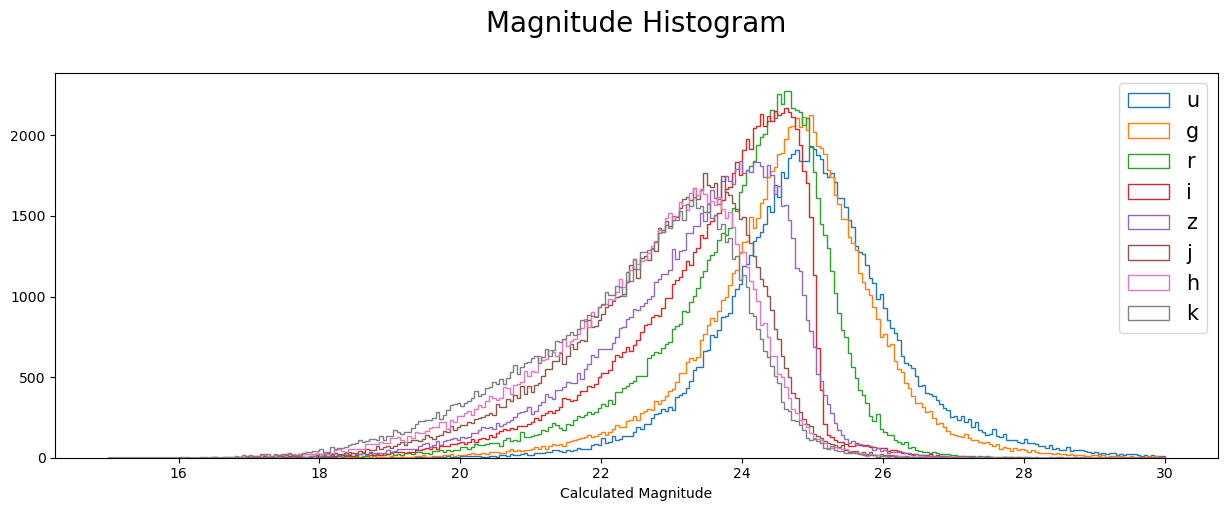

In [3]:
mag = flux_to_mag(t['DESD_flux_ugrizjhk'])

r = (15,30) ; labels = list('ugrizjhk')
[plt.hist(mag[:,i], 300, range=r, histtype='step', label=l) for i, l in enumerate(labels)]

plt.legend(fontsize=15)
plt.title("Magnitude Histogram\n", fontsize=20)
plt.xlabel('Calculated Magnitude')
plt.gcf().set_size_inches((15,5))
plt.show()

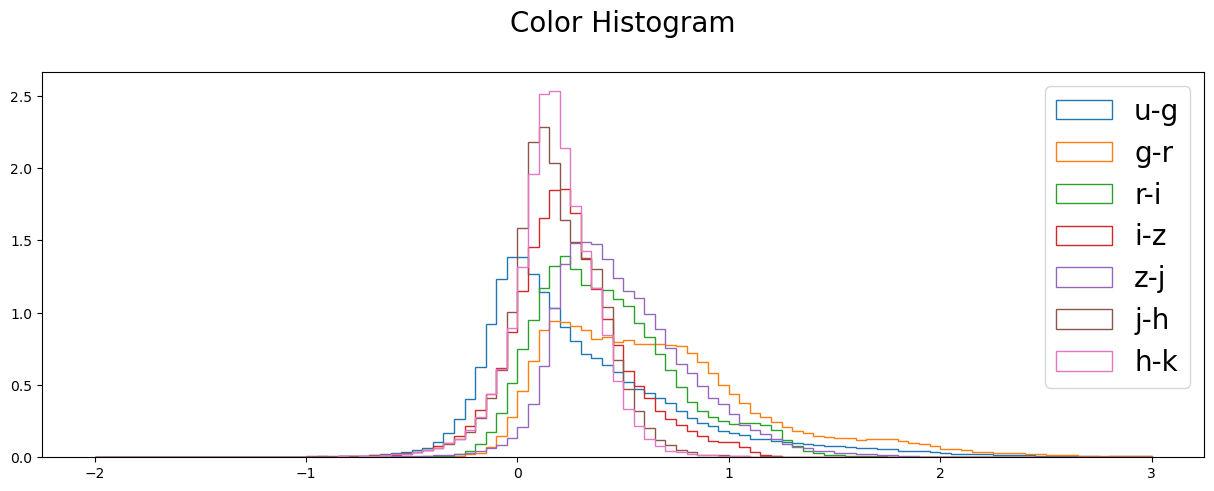

In [4]:
r = (-2, 3) ; labels = ['%s-%s'%(f,n) for f,n in zip('ugrizjhk', 'grizjhk')]
for i, l in enumerate(labels):
    diff = flux_to_mag(t['DESD_flux_ugrizjhk'][:,i]) - flux_to_mag(t['DESD_flux_ugrizjhk'][:,i+1])
    plt.hist(diff, 100, range=r, histtype='step', label=l, density=True)

plt.legend(fontsize=20)
plt.title("Color Histogram\n", fontsize=20)
plt.gcf().set_size_inches((15,5))
plt.show()

/var/folders/nt/7hp8jjq563b09vy01vqx17dh0000gn/T/ipykernel_89253/4177572363.py:1: RuntimeWarning: invalid value encountered in sqrt
  SN = t['DESD_flux_ugrizjhk']/np.sqrt(t['DESD_flux_ugrizjhk'])


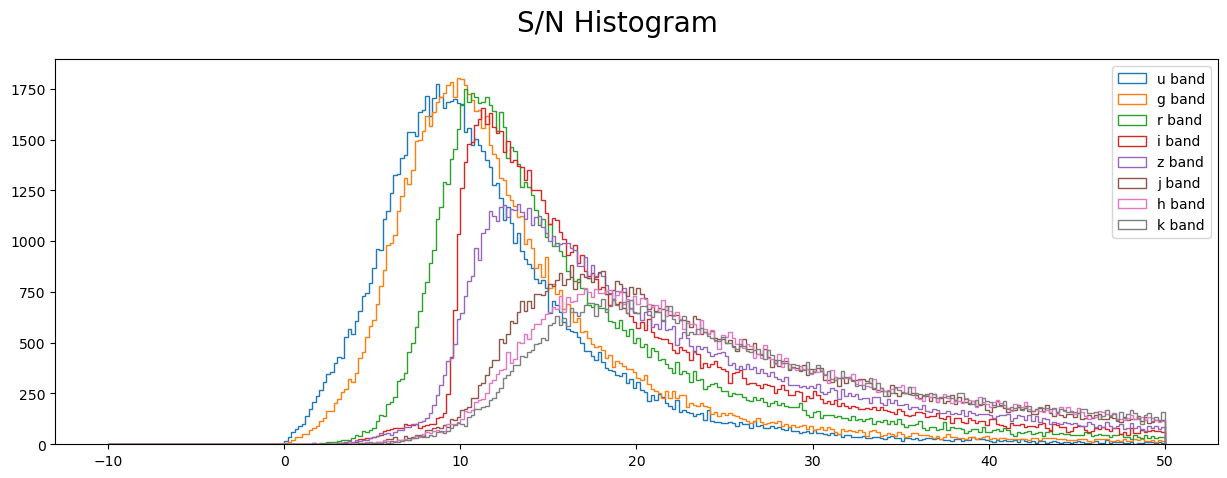

In [5]:
SN = t['DESD_flux_ugrizjhk']/np.sqrt(t['DESD_flux_ugrizjhk'])

r=(-10,50) ; labels = ['%s band'%b for b in 'ugrizjhk']
for i, l in enumerate(labels):
    h = plt.hist(SN[:,i], 300, range=r, histtype='step', label=l)
    
plt.suptitle("S/N Histogram\n", fontsize=20)
plt.legend()
plt.gcf().set_size_inches((15,5))
plt.show()

## Footprint Coverage

In [6]:
def conv(deg):
    if deg < 180:
        return -deg
    else:
        return 360 - deg%360 

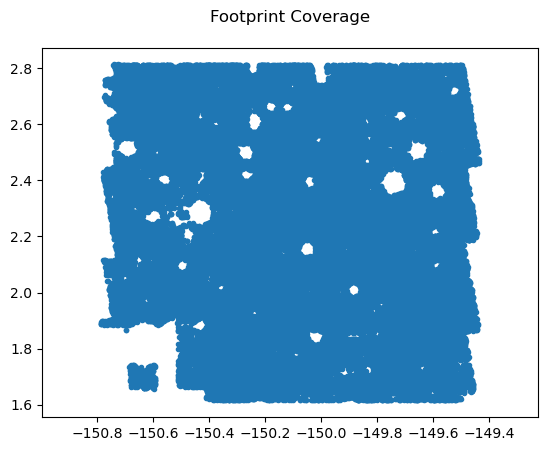

In [7]:
plt.title('Footprint Coverage\n')
plt.scatter([conv(ra) for ra in t['bdf_ra']], t['bdf_dec'], marker='.')
plt.axis('equal')
plt.show()